In [293]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [294]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [295]:
righe, colonne= df.shape
print("Il dataset presenta righe n:", righe, " e colonne n: ", colonne)

Il dataset presenta righe n: 10000  e colonne n:  14


In [296]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [297]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [298]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [299]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [300]:
df.drop(['RowNumber','CustomerId', "Surname"], axis=1, inplace=True)

In [301]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [302]:
#Controlliamo il tipo delle colonne nel dataframe
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#Analisi Esplorativa dei dai


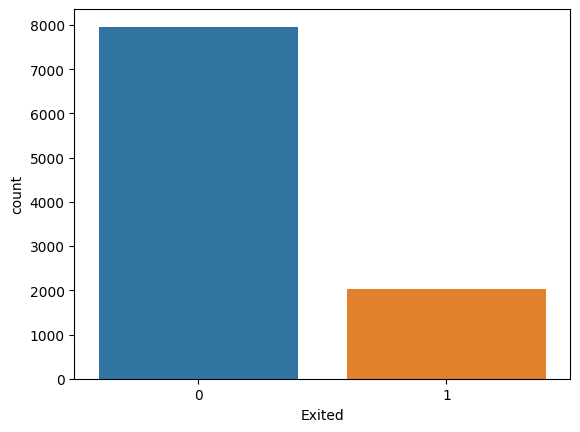

In [303]:
sns.countplot(x=df["Exited"]);

In [304]:
outcome= pd.Series(["Exited" if v==1 else "Retained" for v in df["Exited"]])
df["Outcome"]= outcome

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Outcome
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Retained
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Exited
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Retained
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Retained


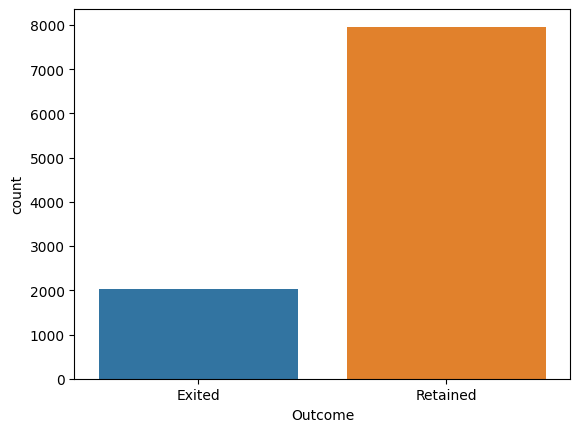

In [305]:
sns.countplot(x=df["Outcome"]);

In [306]:
percentuale_abbandono= (df.Outcome=="Exited").sum()/(df.Outcome=="Exited").count()*100
print("La percentuale di utenti che hanno abbondato: ",round(percentuale_abbandono,2), "%")

La percentuale di utenti che hanno abbondato:  20.37 %


Rappresentare graficamente la frequenza di abbandono per area geografica, genere, se possiede la carta di credito o se è un membro attivo.

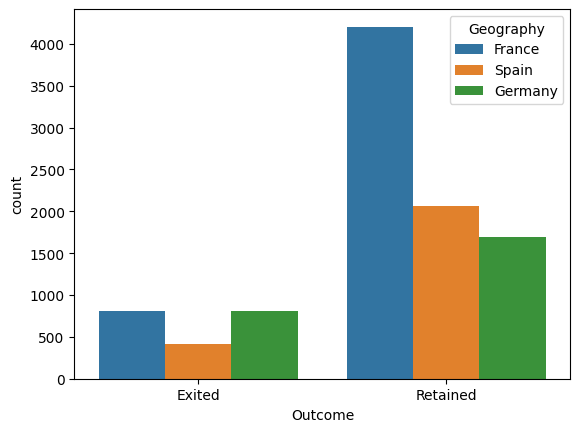

In [307]:
sns.countplot(data=df, x=df["Outcome"], hue="Geography");

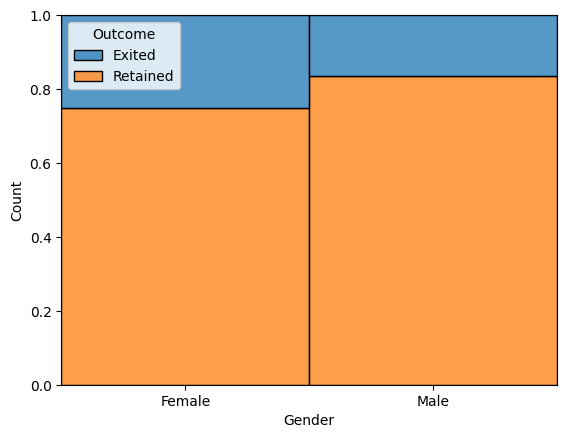

In [308]:
sns.histplot(x='Gender', hue= 'Outcome', data=df, multiple="fill");

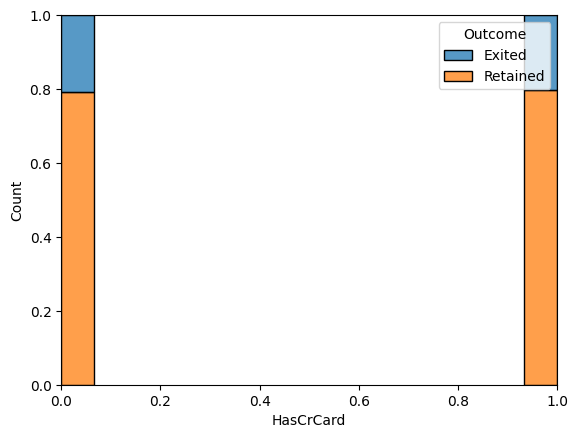

In [309]:
sns.histplot(x='HasCrCard', hue= 'Outcome', data=df, multiple="fill");

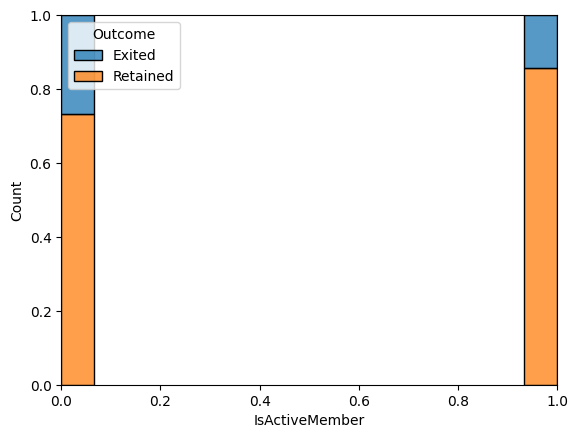

In [310]:
sns.histplot(x='IsActiveMember', hue= 'Outcome', data=df, multiple="fill");

Rappresentare le distribuzioni delle colonne a valori continui rispetto all'outcome

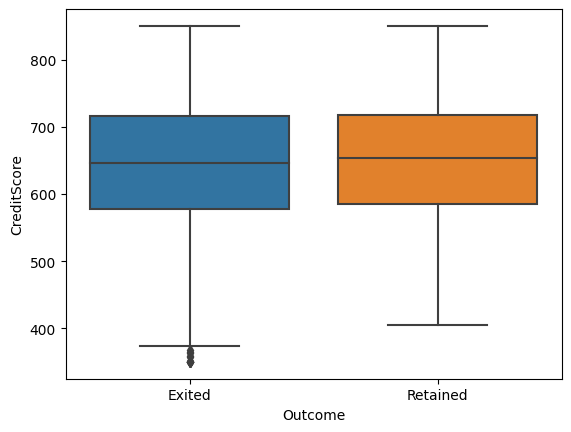

In [311]:
sns.boxplot(x=df["Outcome"], y=df["CreditScore"]);

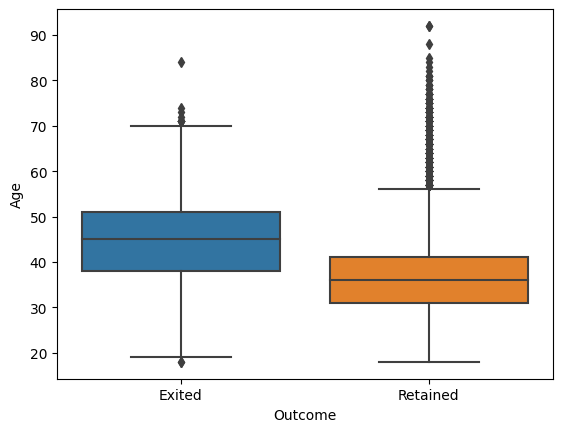

In [312]:
sns.boxplot(x=df["Outcome"], y=df["Age"]);

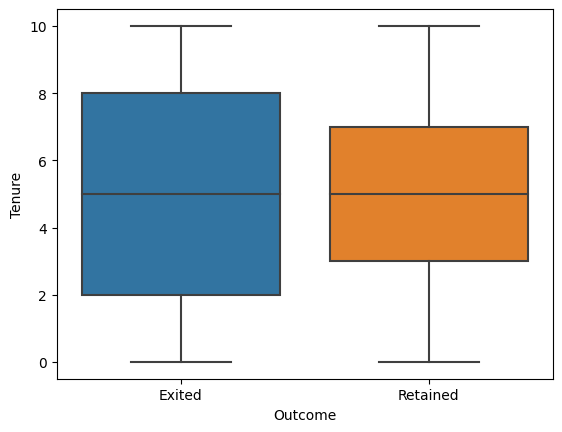

In [313]:
sns.boxplot(x=df["Outcome"], y=df["Tenure"]);

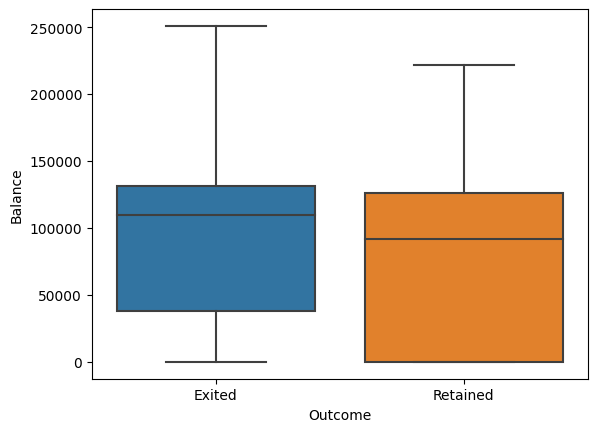

In [314]:
sns.boxplot(x=df["Outcome"], y=df["Balance"]);

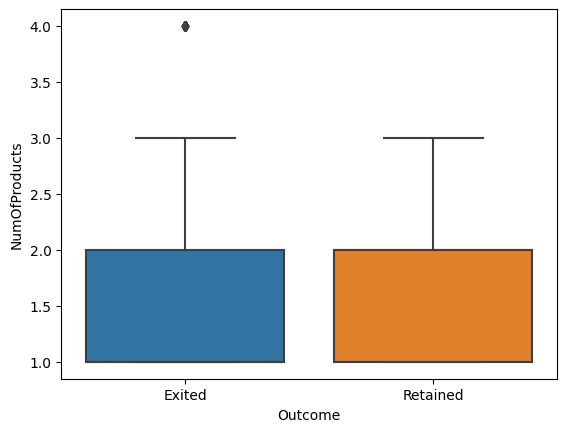

In [315]:
sns.boxplot(x=df["Outcome"], y=df["NumOfProducts"]);

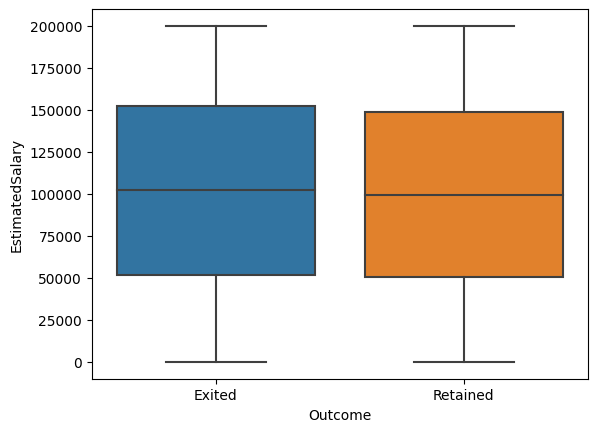

In [316]:
sns.boxplot(x=df["Outcome"], y=df["EstimatedSalary"]);

#Feature Engineering
Dividiamo il dataset in train (80%) e test set(20%)

In [317]:
from sklearn.model_selection import train_test_split

In [318]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print(len(df_train))
print(len(df_test))

8000
2000


In [319]:
df_train['BalanceSalaryRatio']= df_train.Balance/df_train.EstimatedSalary

(-1.0, 5.0)

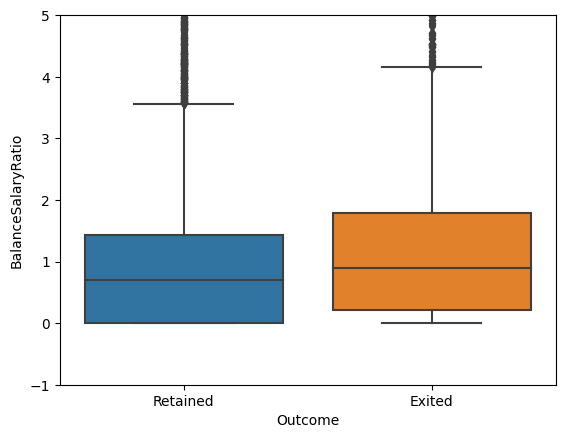

In [320]:
sns.boxplot(x=df_train["Outcome"], y=df_train["BalanceSalaryRatio"]);
plt.ylim(-1,5)

In [321]:
df_train['TenureByAge']= df_train.Tenure/df_train.Age

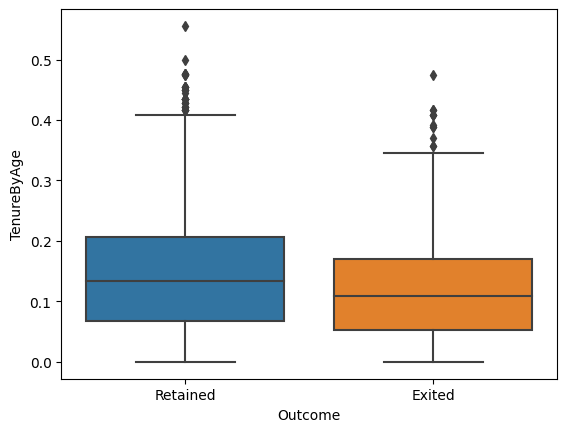

In [322]:
sns.boxplot(x=df_train["Outcome"], y=df_train["TenureByAge"]);

In [323]:
df_train['CreditScoreGivenAge']= df_train.CreditScore/df_train.Age

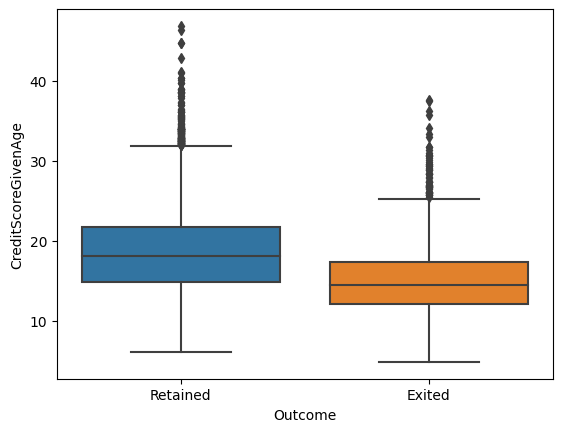

In [324]:
sns.boxplot(x=df_train["Outcome"], y=df_train["CreditScoreGivenAge"]);

In [325]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Outcome,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
9254,686,France,Male,32,6,0.00,2,1,1,179093.26,0,Retained,0.000000,0.187500,21.437500
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0,Retained,0.610395,0.095238,15.047619
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1,Exited,1.335878,0.125000,23.291667
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40,1,Exited,0.886051,0.333333,20.777778
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04,1,Exited,3.599756,0.160714,9.232143


#Data preparation

In [326]:
continuous_vars=['CreditScore', 'Age', 'Tenure', 'Balance', 
                 'NumOfProducts', 'EstimatedSalary',  'BalanceSalaryRatio','TenureByAge', 'CreditScoreGivenAge']
cat_vars=['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']

df_train=df_train[['Exited']+continuous_vars+cat_vars ]
df_train.head()


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
9254,0,686,32,6,0.00,2,179093.26,0.000000,0.187500,21.437500,1,1,France,Male
1561,0,632,42,4,119624.60,2,195978.86,0.610395,0.095238,15.047619,1,1,Germany,Male
1670,1,559,24,3,114739.92,1,85891.02,1.335878,0.125000,23.291667,1,0,Spain,Male
6087,1,561,27,9,135637.00,1,153080.40,0.886051,0.333333,20.777778,1,0,France,Female
6669,1,517,56,9,142147.32,1,39488.04,3.599756,0.160714,9.232143,0,0,France,Male


In [ ]:
df_train["Exited"]= [-1 if v==0 else 1 for v in df_train["Exited"]]
df_train["HasCrCard"]= [-1 if z==0 else 1 for z in df_train["HasCrCard"]]
df_train["IsActiveMember"]= [-1 if t==0 else 1 for t in df_train["IsActiveMember"]]

In [332]:
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
9254,-1,686,32,6,0.00,2,179093.26,0.000000,0.187500,21.437500,1,1,France,Male
1561,-1,632,42,4,119624.60,2,195978.86,0.610395,0.095238,15.047619,1,1,Germany,Male
1670,1,559,24,3,114739.92,1,85891.02,1.335878,0.125000,23.291667,1,-1,Spain,Male
6087,1,561,27,9,135637.00,1,153080.40,0.886051,0.333333,20.777778,1,-1,France,Female
6669,1,517,56,9,142147.32,1,39488.04,3.599756,0.160714,9.232143,-1,-1,France,Male


In [333]:
# Codifica delle variabili categoriche
df_train = pd.get_dummies(df_train, columns=['Gender','Geography'])
df_train.head()                  

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
9254,-1,686,32,6,0.00,2,179093.26,0.000000,0.187500,21.437500,1,1,0,1,1,0,0
1561,-1,632,42,4,119624.60,2,195978.86,0.610395,0.095238,15.047619,1,1,0,1,0,1,0
1670,1,559,24,3,114739.92,1,85891.02,1.335878,0.125000,23.291667,1,-1,0,1,0,0,1
6087,1,561,27,9,135637.00,1,153080.40,0.886051,0.333333,20.777778,1,-1,1,0,1,0,0
6669,1,517,56,9,142147.32,1,39488.04,3.599756,0.160714,9.232143,-1,-1,0,1,1,0,0


In [335]:
df_train["Gender_Female"]= [-1 if a==0 else 1 for a in df_train["Gender_Female"]]
df_train["Gender_Male"]= [-1 if b==0 else 1 for b in df_train["Gender_Male"]]
df_train["Geography_France"]= [-1 if c==0 else 1 for c in df_train["Geography_France"]]
df_train["Geography_Germany"]= [-1 if d==0 else 1 for d in df_train["Geography_Germany"]]
df_train["Geography_Spain"]= [-1 if e==0 else 1 for e in df_train["Geography_Spain"]]

df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
9254,-1,686,32,6,0.00,2,179093.26,0.000000,0.187500,21.437500,1,1,-1,1,1,-1,-1
1561,-1,632,42,4,119624.60,2,195978.86,0.610395,0.095238,15.047619,1,1,-1,1,-1,1,-1
1670,1,559,24,3,114739.92,1,85891.02,1.335878,0.125000,23.291667,1,-1,-1,1,-1,-1,1
6087,1,561,27,9,135637.00,1,153080.40,0.886051,0.333333,20.777778,1,-1,1,-1,1,-1,-1
6669,1,517,56,9,142147.32,1,39488.04,3.599756,0.160714,9.232143,-1,-1,-1,1,1,-1,-1


In [341]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

scaler.fit(df_train[continuous_vars])

scaled= pd.DataFrame(scaler.fit_transform(df_train[continuous_vars]), 
                     columns= continuous_vars, index= df_train.index)

for c in continuous_vars:
  df_train[c]=scaled[c]

df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
9254,-1,0.672,0.189189,0.6,0.000000,0.333333,0.895550,0.000000,0.337500,0.394472,1,1,-1,1,1,-1,-1
1561,-1,0.564,0.324324,0.4,0.476786,0.333333,0.980029,0.000460,0.171429,0.242447,1,1,-1,1,-1,1,-1
1670,1,0.418,0.081081,0.3,0.457317,0.000000,0.429261,0.001007,0.225000,0.438586,1,-1,-1,1,-1,-1,1
6087,1,0.422,0.121622,0.9,0.540606,0.000000,0.765408,0.000668,0.600000,0.378776,1,-1,1,-1,1,-1,-1
6669,1,0.334,0.513514,0.9,0.566554,0.000000,0.197107,0.002715,0.289286,0.104088,-1,-1,-1,1,1,-1,-1


#Model fitting e selection

In [342]:
#Support functions
from sklearn.model_selection  import cross_val_score, GridSearchCV
#Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score,classification_report

In [343]:
def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)

In [344]:
#Fit primal logistic regression
param_grid={'C': [0.1,0.5,1,10,50,100],
            'max_iter':[250], 'fit_intercept':[True],
            'intercept_scaling':[1],
            'penalty':['l2'],
            'tol': [0.00001, 0.0001, 0.000001]}
log_primal_Grid=GridSearchCV(
    LogisticRegression(solver='lbfgs'),
    param_grid, cv=10, refit=True, verbose=0)

log_primal_Grid.fit(
    df_train.loc[:, df_train.columns != 'Exited'],
    df_train.Exited)

best_model(log_primal_Grid)

0.8165000000000001
{'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=10, max_iter=250, tol=1e-05)


In [ ]:
#Fit primal logistic regression
param_grid={'max_depth': [3 , 5, 6, 7, 8],
                    'max_features': [2, 4, 6, 7, 8, 9],
                    'n_estimators':[50,100],
                    'min_samples_split': [3, 5, 6, 7]
                    }

RanFor_grid=GridSearchCV(RandomForestClassifier(),
    param_grid, cv=5, refit=True, verbose=0)

RanFor_grid.fit(
    df_train.loc[:, df_train.columns != 'Exited'],
    df_train.Exited)

best_model(RanFor_grid)